### Import

In [11]:
import os
import pandas as pd
from collections import Counter
import random
import cv2
import numpy as np
from collections import defaultdict
from tqdm import tqdm
from PIL import Image, ImageOps

### Load Dataset

In [12]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 윈도우 기본 한글 폰트 경로 (환경에 따라 다를 수 있음)
font_path = "C:/Windows/Fonts/malgun.ttf"  
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)

In [13]:
# 데이터 경로
DATA_DIR = './data/train'

# 클래스 목록 가져오기
class_dirs = [d for d in os.listdir(DATA_DIR) if os.path.isdir(os.path.join(DATA_DIR, d))]
print(f"클래스 목록: {class_dirs}")
print(len(class_dirs), "클래스")

# 클래스별 이미지 경로 수집
data = []
for cls in class_dirs:
    cls_dir = os.path.join(DATA_DIR, cls)
    for img_name in os.listdir(cls_dir):
        if img_name.lower().endswith(('.jpg', '.jpeg', '.png')):
            img_path = os.path.join(cls_dir, img_name)
            img_path = os.path.normpath(img_path)  # 경로 정규화
            data.append({
                'class': cls,
                'img_path': img_path
            })

df = pd.DataFrame(data)

클래스 목록: ['1시리즈_F20_2013_2015', '1시리즈_F20_2016_2019', '1시리즈_F40_2020_2024', '2008_2015_2017', '2시리즈_그란쿠페_F44_2020_2024', '2시리즈_액티브_투어러_F45_2019_2021', '2시리즈_액티브_투어러_U06_2022_2024', '3008_2세대_2018_2023', '3시리즈_E90_2005_2012', '3시리즈_F30_2013_2018', '3시리즈_G20_2019_2022', '3시리즈_G20_2023_2025', '3시리즈_GT_F34_2014_2021', '4시리즈_F32_2014_2020', '4시리즈_G22_2021_2023', '4시리즈_G22_2024_2025', '5008_2세대_2018_2019', '5008_2세대_2021_2024', '5시리즈_F10_2010_2016', '5시리즈_G30_2017_2023', '5시리즈_G60_2024_2025', '5시리즈_GT_F07_2010_2017', '6시리즈_F12_2011_2018', '6시리즈_GT_G32_2018_2020', '6시리즈_GT_G32_2021_2024', '718_박스터_2017_2024', '718_카이맨_2017_2024', '7시리즈_F01_2009_2015', '7시리즈_G11_2016_2018', '7시리즈_G11_2019_2022', '7시리즈_G70_2023_2025', '8시리즈_G15_2020_2024', '911_2003_2019', '911_992_2020_2024', 'A4_B9_2016_2019', 'A4_B9_2020_2024', 'A5_F5_2019_2024', 'A6_C8_2019_2025', 'A7_2012_2016', 'A7_4K_2020_2024', 'A8_D5_2018_2023', 'All_New_XJ_2016_2019', 'AMG_GT_2016_2024', 'A_클래스_W176_2015_2018', 'A_클래스_W177_2020_2025', 

### CLAHE

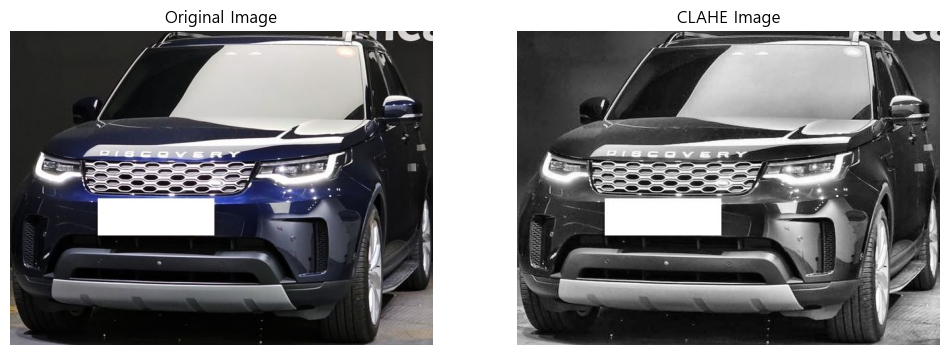

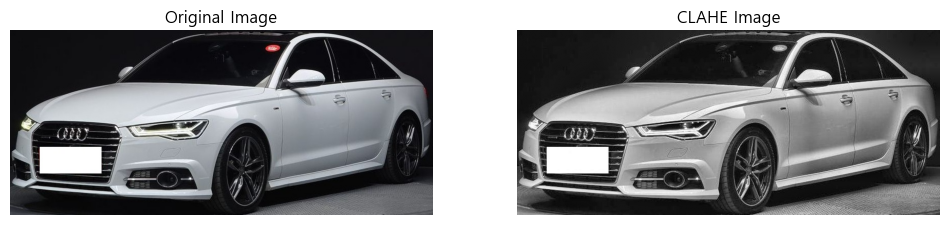

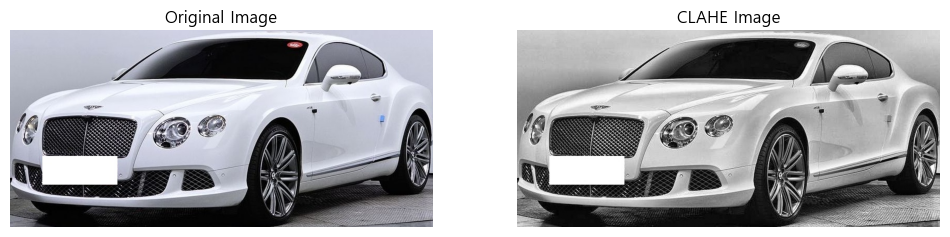

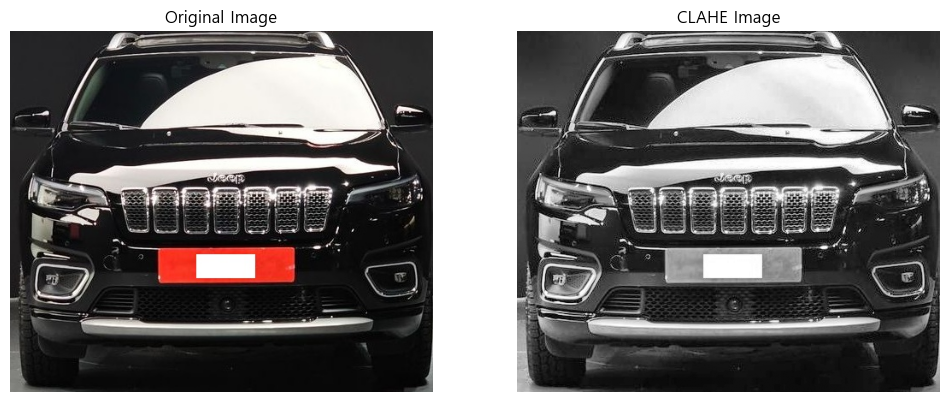

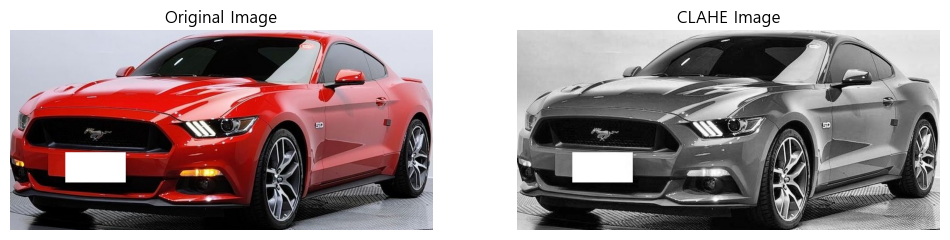

In [14]:
# CLAHE 전처리 함수 (PIL 기반)
def apply_clahe_pil(pil_img):
    gray = pil_img.convert('L')  # 그레이스케일 변환
    img_np = np.array(gray)

    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    clahe_np = clahe.apply(img_np)

    return Image.fromarray(clahe_np)

# 시각화 함수
def visualize_pil_images(original, processed, title_processed='Processed Image'):
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))
    axs[0].imshow(original)
    axs[0].set_title('Original Image')
    axs[0].axis('off')

    axs[1].imshow(processed, cmap='gray')  # CLAHE는 grayscale이니 cmap='gray'
    axs[1].set_title(title_processed)
    axs[1].axis('off')

    plt.show()

sample_num = 5
sample_indices = random.sample(range(len(df)), sample_num)

for idx in sample_indices:
    img_path = df.iloc[idx]['img_path']
    original_img = Image.open(img_path).convert('RGB')

    # CLAHE 처리
    clahe_img = apply_clahe_pil(original_img)

    # 시각화
    visualize_pil_images(original_img, clahe_img, 'CLAHE Image')

### Histogram Equalization

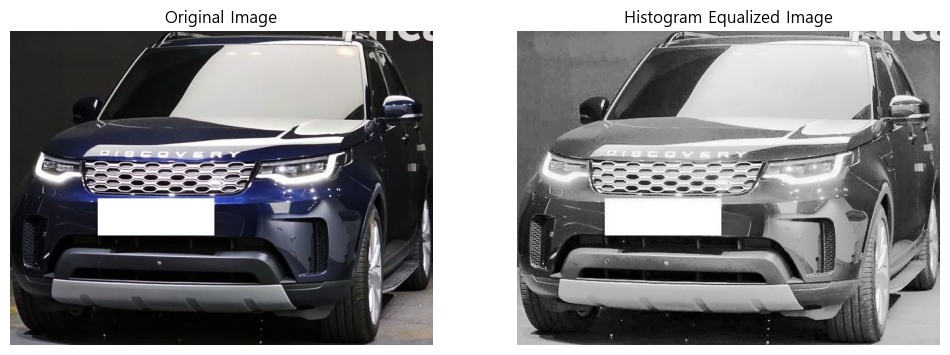

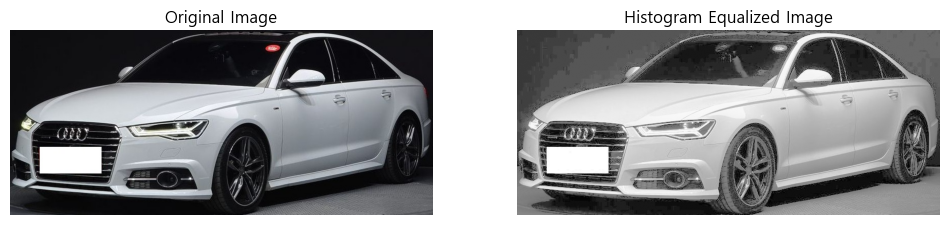

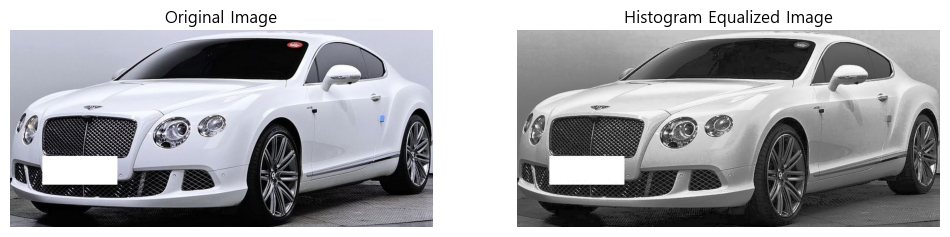

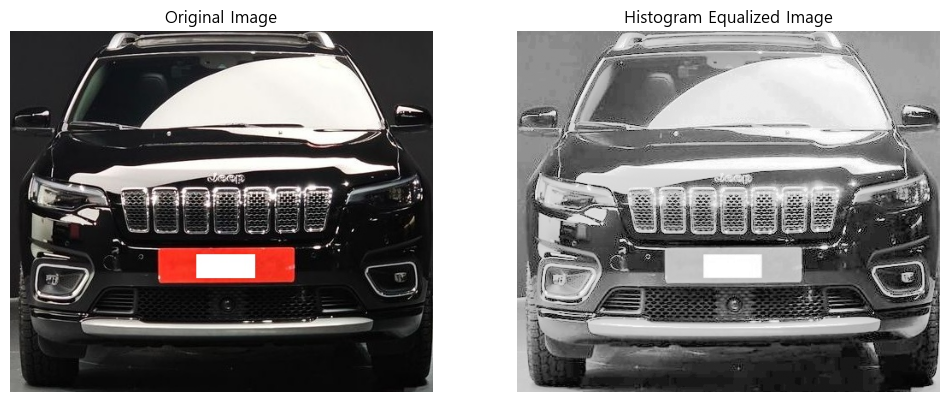

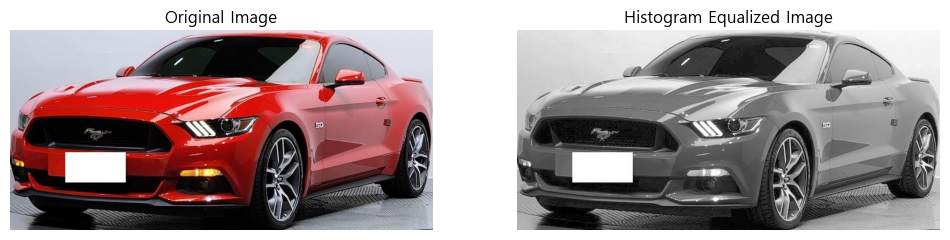

In [15]:
def apply_hist_eq_pil(pil_img):
    gray = pil_img.convert('L')
    img_np = np.array(gray)
    eq_np = cv2.equalizeHist(img_np)
    return Image.fromarray(eq_np)

for idx in sample_indices:
    img_path = df.iloc[idx]['img_path']
    original_img = Image.open(img_path).convert('RGB')

    equalized_img = apply_hist_eq_pil(original_img)

    visualize_pil_images(original_img, equalized_img, 'Histogram Equalized Image')